# Amazon Sales Analytics

## Problem Statement

Analyze and provide Insights on Amazon Sales.

## Problem Description

The provided dataset contains information about sales transactions on Amazon, including details such as order 
ID, date, status, fulfilment method, sales channel, product category, size, quantity, amount, shipping details, 
and more. The objective is to conduct a comprehensive analysis of the data and extract actionable insights to 
support business decision-making.

## 1. Data Collection (ETL)

Importing necessary Libraries and dataset for analysis

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import statistics as st

In [97]:
data = pd.read_csv('amazon_sales_data.csv')
df = pd.DataFrame(data)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


### Understanding the Distribution of Data

**1. Qty:**
      The data indicates that the majority of the Qty column values are concentrated around 1, proved by the fact that 75% of the values are exactly 1. This tight clustering around 1 is further supported by the small standard deviation (0.313), which indicates minimal variability in the dataset. The presence of a maximum value of 15 suggests a few instances of significantly larger quantities.          
**2. Amount:**
       The differences in the central tendencies highlight a higher spread of values in the Amount column with a mean value of 645 and standard deviation of 281. The noticeable difference between the mean (648.56) and the median (605) suggests a dynamic and skewed distribution of values.

In [98]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


### Data Cleaning and Data Manipulation

Data and its types are explored and manipulated as per the requirements.

In [99]:
df[['full_date']] = df[['Date']]

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [101]:
print(df.isnull().sum())

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
full_date                  0
dtype: int64


**Droping null columns**

In [102]:
df = df.drop(['New', 'PendingS'], axis=1)

**Droping the rows having zero quantity that represents faulty and incorrect data**

In [103]:
df.loc[pd.isna(df['Amount']) & (df['Qty'] == 0), "Amount"] = 0
df['currency'] = df['currency'].fillna('INR')

**Droping rows not having any postal code**

In [104]:
df = df.dropna(subset = ['ship-postal-code'])
df['ship-postal-code'] = df['ship-postal-code'].astype(int)

In [105]:
df['fulfilled-by'] = df['fulfilled-by'].fillna('Unknown')

In [106]:
print(df.isnull().sum())

index                   0
Order ID                0
Date                    0
Status                  0
Fulfilment              0
Sales Channel           0
ship-service-level      0
Category                0
Size                    0
Courier Status          0
Qty                     0
currency                0
Amount                124
ship-city               0
ship-state              0
ship-postal-code        0
ship-country            0
B2B                     0
fulfilled-by            0
full_date               0
dtype: int64


**Standardizing the different varied forms of State's and cities names into a consistent format across all rows.**

In [107]:
df['ship-city'] = df['ship-city'].str.strip()
df['ship-city'] = df['ship-city'].str.upper()
df['ship-city'] = df['ship-city'].str.replace(r'[.,]', '', regex = True)
df['ship-state'] = df['ship-state'].str.strip()
df['ship-state'] = df['ship-state'].str.upper()
df['ship-state'] = df['ship-state'].str.replace(r'[.,]', '', regex = True)

In [108]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,full_date
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,04-30-22
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,04-30-22
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Unknown,04-30-22
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship,04-30-22
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,Unknown,04-30-22


In [109]:
df.loc[df['ship-state'].isin(['RAJSHTHAN', 'RAJSTHAN', 'RJ']), 'ship-state'] = 'RAJASTHAN'
df.loc[df['ship-state'] == 'ORISSA', 'ship-state'] = 'ODISHA'
df.loc[df['ship-state'] == 'PONDICHERRY', 'ship-state'] = 'PUDUCHERRY'
df.loc[df['ship-state'] == 'AR', 'ship-state'] = 'ARUNACHAL PRADESH'
df.loc[df['ship-state'] == 'APO', 'ship-state'] = 'ANDHRA PRADESH'
df.loc[df['ship-state'] == 'NL', 'ship-state'] = 'NAGALAND'
df.loc[df['ship-state'] == 'PB', 'ship-state'] = 'PUNJAB'
df.loc[df['ship-state'] == 'NEW DELHI', 'ship-state'] = 'DELHI'

In [ ]:
df.loc[df['ship-state'] == 'PUNJAB/MOHALI/ZIRAKPUR', 'ship-state'] = 'PUNJAB'

In [ ]:
city = df.groupby('ship-state')['Qty'].sum().reset_index()
city.sort_values(by = 'Qty', ascending = False)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed').dt.month
df.head()

## 2. Exploratory Data Analysis

### **1. Sales Overview:** Understanding the overall sales performance, trends, and patterns over time. 

### Sales performance over Months.

From the chart below, we can observe that sales started with little to no activity on March, 2022. There was an impressive surge in sales leading up to April. However, following this peak in April, sales began to decline steadily, decreasing by approximately 1 million each month.

In [43]:
month_map = {i: calendar.month_name[i] for i in range(1, 13)}

In [44]:
df_filtered = df[df['Qty'] != 0]
df_filtered2 = df_filtered.copy()
df_filtered2['Date'] = df_filtered2['Date'].astype(int)
df_filtered2['month_name'] = df_filtered2['Date'].map(month_map)
revenue = df_filtered2.groupby(['Date', 'month_name'])['Amount'].sum().reset_index()
revenue

,Date,month_name,Amount
0,3,March,98261.0
1,4,April,27572392.0
2,5,May,25112855.0
3,6,June,22598327.0


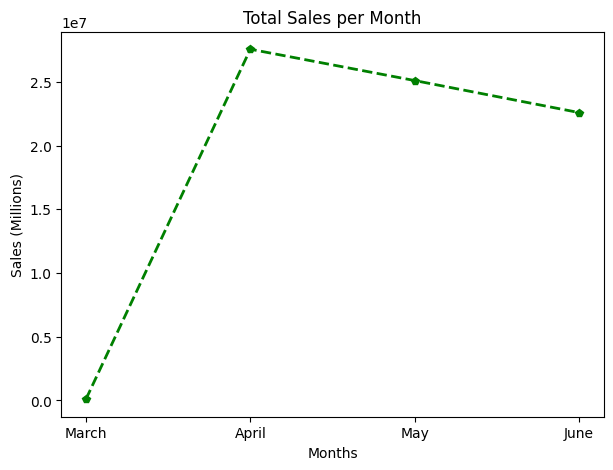

In [45]:
plt.figure(figsize = (7, 5))
# color = ['green', 'grey', 'pink', 'peachpuff']
plt.plot(revenue['month_name'], revenue['Amount'], linestyle = '--', marker = 'p', color = 'g', linewidth = 2)
plt.ylabel('Sales (Millions)')
plt.xlabel('Months')
plt.title('Total Sales per Month')
plt.show()

### Sales by Channel

The table below concludes that the Amazon sales channel was dominant, with no orders recorded from any other channels.

In [46]:
revenue_channel = df_filtered.groupby('Sales Channel')['Amount'].sum()
revenue_channel.reset_index()

,Sales Channel,Amount
0,Amazon.in,75381835.0
1,Non-Amazon,0.0


### **2. Product Analysis:** Analyzing the distribution of product categories, sizes, and quantities sold to identify popular products.

### Category Distribution

Pie Chart below shows the proportion of sales for each product category.

In [47]:
clothes = df.groupby('Category')['Qty'].sum().reset_index()
clothes.loc[clothes['Qty'] < 8000, 'Category'] = 'Others'
clothes_n = clothes.groupby('Category')['Qty'].sum().reset_index()
clothes_n.sort_values(by = 'Qty', ascending = False)

,Category,Qty
3,T-shirt,45281
2,Shirt,45029
0,Blazzer,13942
4,Trousers,9895
1,Others,2469


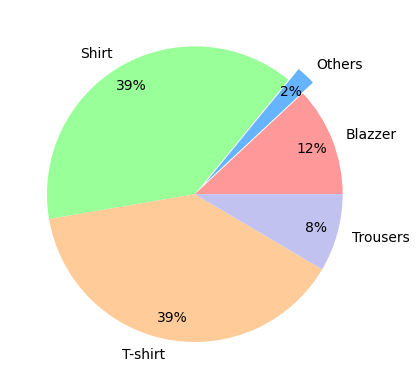

In [48]:
# palette = sns.color_palette('dark')
explode = [0, 0.1, 0, 0, 0]
palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
plt.pie(clothes_n['Qty'], labels = clothes_n['Category'], colors = palette[: len(clothes_n)], explode = explode, autopct = '%0.f%%', pctdistance = 0.85)
plt.show()

### Size Distribution

The stacked chart below displays the sales of various sizes across different product categories. It highlights that T-shirts in size M have the highest number of orders, followed by shirts, blazers, and other items.

In [49]:
df_new = df_filtered.copy()
df_new.loc[df_new['Category'].isin(['Wallet', 'Perfume', 'Shoes', 'Socks', 'Watch']), 'Category'] = 'Others'
sizes = df_new.groupby(['Category', 'Size'])['Qty'].sum().reset_index()
sizes

,Category,Size,Qty
0,Blazzer,3XL,1758
1,Blazzer,L,2545
2,Blazzer,M,2326
3,Blazzer,S,1963
4,Blazzer,XL,2126
5,Blazzer,XS,1279
6,Blazzer,XXL,1945
7,Others,3XL,60
8,Others,Free,2070
9,Others,L,68


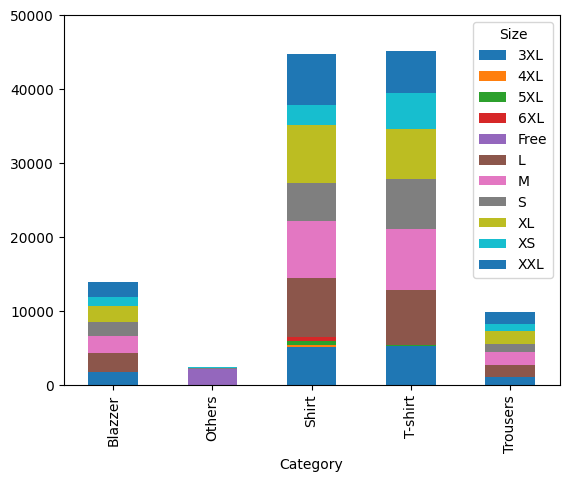

In [50]:
crosstab = pd.crosstab(df_new['Category'], df_new['Size'])
# Plotting the stacked bar plot
crosstab.plot(kind='bar', stacked=True)
plt.ylim(0, 50000)
plt.show()

In [51]:
# Revenue generated by each category
df_new

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,full_date
1,1,171-9198151-1101146,4,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,4
2,2,404-0687676-7273146,4,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Unknown,4
4,4,407-1069790-7240320,4,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073,IN,False,Unknown,4
5,5,404-1490984-4578765,4,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102,IN,False,Unknown,4
6,6,408-5748499-6859555,4,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036,IN,False,Unknown,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,5,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013,IN,False,Unknown,5
128972,128971,402-9551604-7544318,5,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004,IN,False,Unknown,5
128973,128972,407-9547469-3152358,5,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049,IN,False,Unknown,5
128974,128973,402-6184140-0545956,5,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,HALOL,GUJARAT,389350,IN,False,Unknown,5


### Revenue by Category

In [52]:
month_map = {i: calendar.month_name[i] for i in range(1, 13)}
df_blazzer = df_new[df_new['Category'] == 'Blazzer'].copy()
df_blazzer['month_name'] = df_blazzer['Date'].map(month_map)
blazzer = df_blazzer.groupby(['Date', 'month_name'])['Qty'].sum().reset_index()
blazzer

,Date,month_name,Qty
0,3,March,6
1,4,April,3778
2,5,May,5408
3,6,June,4750


In [53]:
month_map = {i: calendar.month_name[i] for i in range(1, 13)}
df_shirt = df_new[df_new['Category'] == 'Shirt'].copy()
df_shirt['month_name'] = df_shirt['Date'].map(month_map)
shirts = df_shirt.groupby(['Date', 'month_name'])['Qty'].sum().reset_index()
shirts.sort_values(by = 'Date', ascending = True)

,Date,month_name,Qty
0,3,March,71
1,4,April,17669
2,5,May,13544
3,6,June,13745


In [54]:
month_map = {i: calendar.month_name[i] for i in range(1, 13)}
df_tshirt = df_new[df_new['Category'] == 'T-shirt'].copy()
df_tshirt['month_name'] = df_tshirt['Date'].map(month_map)
tshirts = df_tshirt.groupby(['Date', 'month_name'])['Qty'].sum().reset_index()
tshirts.sort_values(by = 'Date', ascending = True)

,Date,month_name,Qty
0,3,March,68
1,4,April,18142
2,5,May,14402
3,6,June,12669


In [55]:
month_map = {i: calendar.month_name[i] for i in range(1, 13)}
df_trousers = df_new[df_new['Category'] == 'Trousers'].copy()
df_trousers['month_name'] = df_trousers['Date'].map(month_map)
trousers = df_trousers.groupby(['Date', 'month_name'])['Qty'].sum().reset_index()
trousers.sort_values(by = 'Date', ascending = True)

,Date,month_name,Qty
0,3,March,9
1,4,April,3654
2,5,May,3763
3,6,June,2469


In [56]:
month_map = {i: calendar.month_name[i] for i in range(1, 13)}
df_others = df_new[df_new['Category'] == 'Others'].copy()
df_others['month_name'] = df_others['Date'].map(month_map)
others = df_others.groupby(['Date', 'month_name'])['Qty'].sum().reset_index()
others.sort_values(by = 'Date', ascending = True)

,Date,month_name,Qty
0,3,March,2
1,4,April,948
2,5,May,883
3,6,June,636


In [57]:
print(sns.color_palette("blend:#7AB,#EDA").as_hex())
print(sns.color_palette("dark:#5A9_r").as_hex())
print(sns.color_palette("ch:s=.25,rot=-.25").as_hex())
print(sns.color_palette("light:#5A9").as_hex())
print(sns.light_palette("xkcd:copper").as_hex())

['#77aabb', '#8fb4b8', '#a7beb4', '#bec9b1', '#d6d3ad', '#eeddaa']
['#55aa99', '#4b9082', '#41756b', '#375b54', '#2d413d', '#232626']
['#c7dfeb', '#9ebbd7', '#7d92bf', '#636a9f', '#494373', '#2b1f3e']
['#ebf2f0', '#cde4df', '#afd5cd', '#91c7bc', '#73b8aa', '#55aa99']
['#f3f0ef', '#e6d4c7', '#dab89e', '#ce9b76', '#c27f4d', '#b66325']


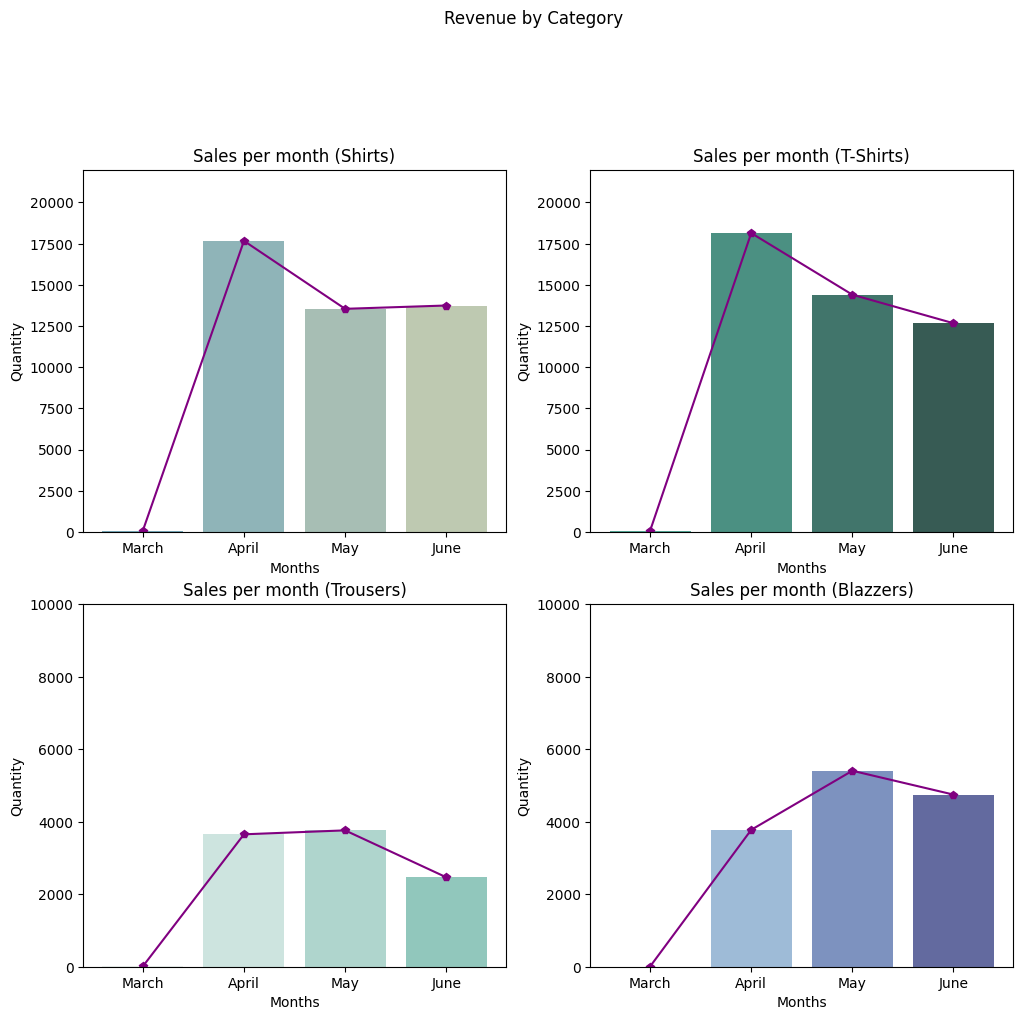

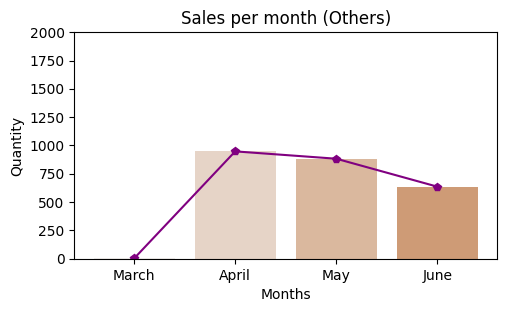

In [58]:
plt.figure(figsize = (12, 16))
plt.suptitle('Revenue by Category')
plt.subplot(3, 2, 1)
color = ['#77aabb', '#8fb4b8', '#a7beb4', '#bec9b1', '#d6d3ad', '#eeddaa']
plt.bar(shirts['month_name'], shirts['Qty'], color = color)
plt.plot(shirts['month_name'], shirts['Qty'], marker = 'p', color = 'purple')
plt.title('Sales per month (Shirts)')
plt.ylabel('Quantity')
plt.xlabel('Months')
plt.ylim(0, 22000)


plt.subplot(3, 2, 2)
color = ['#55aa99', '#4b9082', '#41756b', '#375b54', '#2d413d', '#232626']
plt.bar(tshirts['month_name'], tshirts['Qty'], color = color)
plt.plot(tshirts['month_name'], tshirts['Qty'], marker = 'p', color = 'purple')
plt.title('Sales per month (T-Shirts)')
plt.ylabel('Quantity')
plt.xlabel('Months')
plt.ylim(0, 22000)


plt.subplot(3, 2, 3)
color = ['#ebf2f0', '#cde4df', '#afd5cd', '#91c7bc', '#73b8aa', '#55aa99']
plt.bar(trousers['month_name'], trousers['Qty'], color = color)
plt.plot(trousers['month_name'], trousers['Qty'], marker = 'p', color = 'purple')
plt.title('Sales per month (Trousers)')
plt.ylabel('Quantity')
plt.xlabel('Months')
plt.ylim(0, 10000)


plt.subplot(3, 2, 4)
color = ['#c7dfeb', '#9ebbd7', '#7d92bf', '#636a9f', '#494373', '#2b1f3e']
plt.bar(blazzer['month_name'], blazzer['Qty'], color = color)
plt.plot(blazzer['month_name'], blazzer['Qty'], marker = 'p', color = 'purple')
plt.ylim(0, 10000)
plt.title('Sales per month (Blazzers)')
plt.ylabel('Quantity')
plt.xlabel('Months')
plt.show()

plt.figure(figsize = (12, 10))
plt.subplot(3, 2, 4)
color = ['#f3f0ef', '#e6d4c7', '#dab89e', '#ce9b76', '#c27f4d', '#b66325']
plt.bar(others['month_name'], others['Qty'], color = color)
plt.plot(others['month_name'], others['Qty'], marker = 'p', color = 'purple')
plt.ylim(0, 2000)
plt.title('Sales per month (Others)')
plt.ylabel('Quantity')
plt.xlabel('Months')
plt.show()

Based on the above charts, it is evident that T-shirts generate the highest revenue, followed by shirts, blazers, trousers, and other items.

### **3. Fulfillment Analysis:** Investigating the fulfillment methods used and their effectiveness in delivering orders.

### Distribution of Fulfillment Methods

The chart below illustrates the distribution of services provided by each fulfillment agencies. According to the chart below, services provided by merchant shows minimal or no canceled orders, with the majority of orders being shipped and some currently in transit. The data also indicates that Amazon fulfillment service dominates, although there are instances of unshipped and canceled orders handled by Amazon.

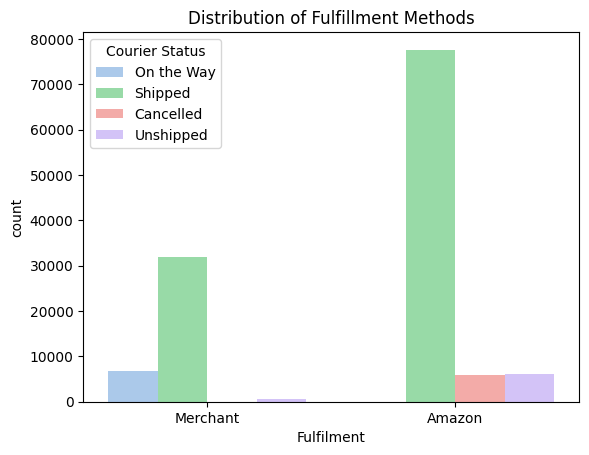

In [59]:
palette = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff']
sns.countplot(x='Fulfilment', data=df, hue = 'Courier Status', palette = palette)
plt.title('Distribution of Fulfillment Methods')
plt.show()

### Service Level

The chart clearly illustrates the difference in shipping service levels provided by each fulfillment agency. It shows that Expedited Shipping had significantly more orders shipped compared to Standard Shipping. Additionally, it's evident that a larger number of customers preferred Expedited shipping over Standard shipping.

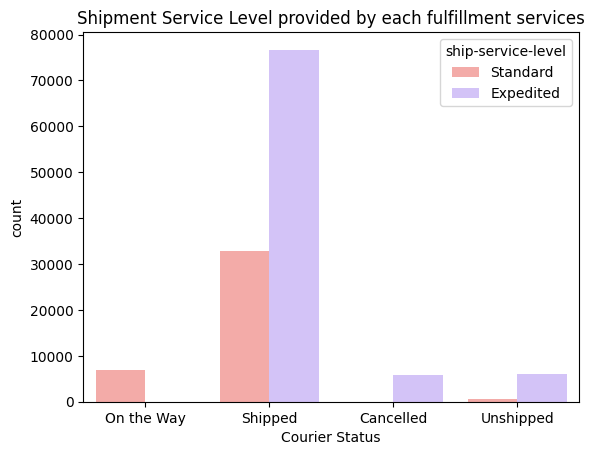

In [60]:
#Service level 
palette = ['#ff9f9b', '#d0bbff']
sns.countplot(x='Courier Status', data=df, hue = 'ship-service-level', palette = palette)
plt.title('Shipment Service Level provided by each fulfillment services')
plt.show()

### Delivery Effectiveness

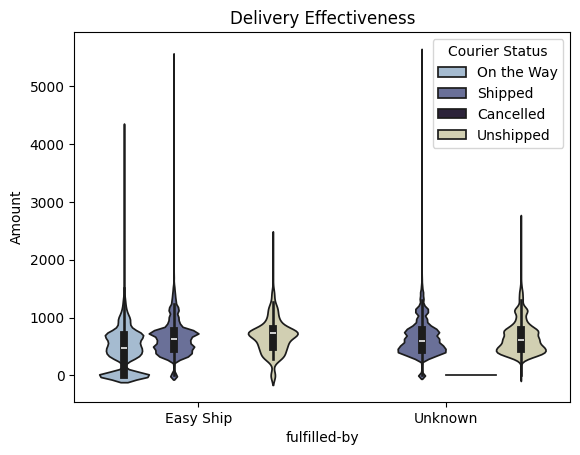

In [61]:
# Delivery Effectiveness
palette = ['#9ebbd7', '#636a9f', '#2b1f3e','#d6d3ad']
sns.violinplot(x='fulfilled-by', y='Amount', hue='Courier Status', data=df, palette = palette)
plt.title('Delivery Effectiveness')
plt.show()

### Courier Status

In [62]:
problem_in_courier = df.groupby('Status')['Qty'].count().reset_index()
problem_in_courier.sort_values(by = 'Qty', ascending = False)

,Status,Qty
3,Shipped,77797
5,Shipped - Delivered to Buyer,28749
0,Cancelled,18327
10,Shipped - Returned to Seller,1951
8,Shipped - Picked Up,973
1,Pending,658
2,Pending - Waiting for Pick Up,281
11,Shipped - Returning to Seller,145
7,Shipped - Out for Delivery,35
9,Shipped - Rejected by Buyer,11


### Time Taken to deliver the Orders

The table below indicates that no courier statuses have been updated, resulting in zero records.

In [75]:
df_new['Date'] = pd.to_datetime(df['full_date'], format = 'mixed')
df_new['Date'].dt.date
df_shipped = df_new[df_new['Status'] == 'Shipping']
df_deliver = df_new[df_new['Courier Status'] == 'Shipped']
df_merged = pd.merge(df_shipped, df_deliver, on = 'Order ID', suffixes=('_ship', '_deliver'))
df_merged['Days_to_deliver'] = (df_merged['Date_deliver'] - df_merged['Date_ship']).dt.days
result = df_merged[['Order ID', 'Date_ship', 'Date_deliver', 'Days_to_deliver']]
result

,Order ID,Date_ship,Date_deliver,Days_to_deliver


### **4. Customer Segmentation:** Segment customers based on their buying behaviour, locaƟon, and other relevant factors.

### Buying Behaviour

The histogram below reveals that most transactions are conducted as business-to-consumer rather than business-to-business. This indicates that there are minimal or no business-to-business deals.

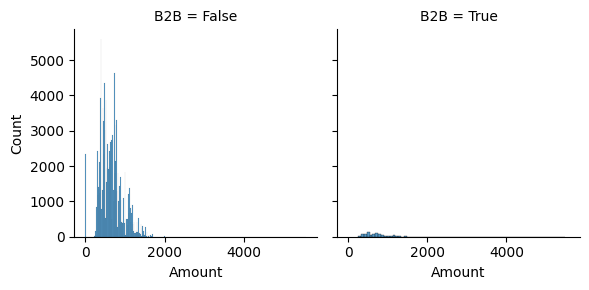

In [76]:
#Buying Behaviour
g = sns.FacetGrid(df_new, col='B2B', margin_titles=True)
g.map(sns.histplot, 'Amount')
plt.show()

### **5. Geographical analysis:** Explore the geographical distribution of sales, focusing on states and cities.

### Sales by region

The plot below illustrates the types of transactions for each state, showing that Punjab has the highest B2B sales, while Ladakh has the highest B2C sales.

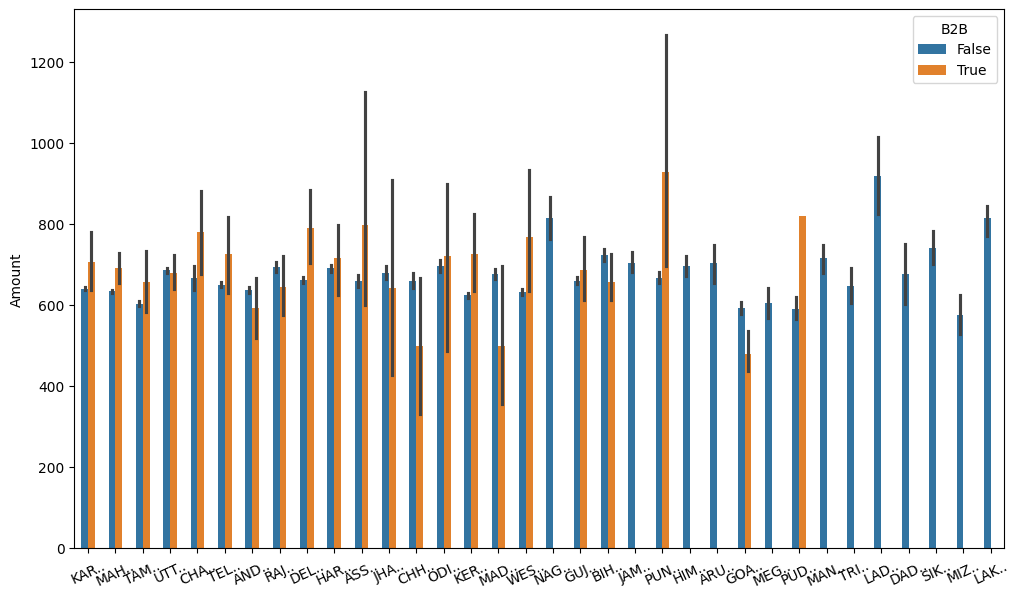

In [78]:
label = df_filtered['ship-state']
shorten = [i[0:3] + '..' for i in label]
plt.figure(figsize = (12, 7))
sns.barplot(data= df_filtered, y = 'Amount', x= shorten, hue = 'B2B', width = 0.5)
plt.xticks(rotation = 25)
plt.show()

### Sales of each category at each State

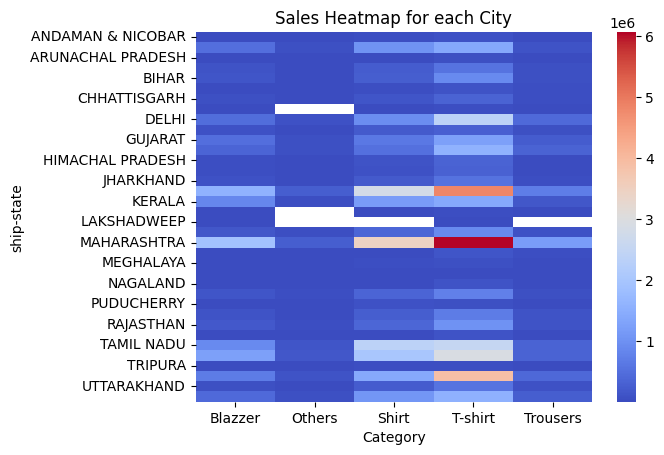

In [83]:
pivot_table = df_new.pivot_table(columns='Category', index='ship-state', values='Amount', aggfunc='sum')
sns.heatmap(pivot_table, cmap = 'coolwarm')
plt.title('Sales Heatmap for each City')
plt.show()

### Product Prefernces for each region

The table below displays the most popular products among people from different regions. It can be observed that T-shirts are the most popular product, dominating across all regions regardless of regional differences.

In [84]:
#Product Prefernces for each region
cities = df_new.groupby(['ship-state', 'Category'])['Qty'].sum().reset_index()
max_state = cities.loc[cities.groupby(['ship-state'])['Qty'].idxmax()]
max_state

,ship-state,Category,Qty
3,ANDAMAN & NICOBAR,T-shirt,107
7,ANDHRA PRADESH,Shirt,2295
13,ARUNACHAL PRADESH,T-shirt,57
18,ASSAM,T-shirt,657
23,BIHAR,T-shirt,1023
28,CHANDIGARH,T-shirt,138
33,CHHATTISGARH,T-shirt,385
37,DADRA AND NAGAR,T-shirt,30
42,DELHI,T-shirt,2869
46,GOA,Shirt,471


### Top 5 Sales Region (City)

The table below portrays that Bengaluru has the highest number of Amazon customers, followed by Hyderabad, Mumbai, and other cities. Similarly, Maharashtra is the state with the most Amazon customers, followed by Karnataka, Telangana, and others.

In [86]:
top_5_c = df_new.groupby(['ship-city'])['Amount'].sum().reset_index()
top_5_c.sort_values(by = 'Amount', ascending = False).head(5)

,ship-city,Amount
748,BENGALURU,7064106.0
2372,HYDERABAD,5389153.0
4055,MUMBAI,4156835.0
4445,NEW DELHI,3807413.0
1212,CHENNAI,3472936.0


### Top 5 Sales region (States)

In [87]:
# Top 5 sales Region
top_5 = df_new.groupby(['ship-state'])['Amount'].sum().reset_index()
top_5.sort_values(by = 'Amount', ascending = False).head(5)

,ship-state,Amount
20,MAHARASHTRA,12868848.0
15,KARNATAKA,10153717.0
31,TELANGANA,6642126.0
33,UTTAR PRADESH,6501318.0
30,TAMIL NADU,6245369.0


In [274]:
month_map = {i: calendar.month_name[i] for i in range(1, 13)}
df_state1 = df_filtered2.copy()
df_state1['month_name'] = df_filtered2['Date'].map(month_map)
df_state1 = df_state1[df_state1['ship-state'] == 'MAHARASHTRA']
state1 = df_state1.groupby(['Date', 'month_name'])['Amount'].sum().reset_index()
state1

,Date,month_name,Amount
0,3,March,16367.0
1,4,April,4739074.0
2,5,May,4345216.0
3,6,June,3768191.0


In [275]:
df_state2 = df_filtered2.copy()
df_state2['month_name'] = df_filtered2['Date'].map(month_map)
df_state2 = df_state2[df_state2['ship-state'] == 'KARNATAKA']
state2 = df_state2.groupby(['Date', 'month_name'])['Amount'].sum().reset_index()
state2

,Date,month_name,Amount
0,3,March,13073.0
1,4,April,3644394.0
2,5,May,3270279.0
3,6,June,3225971.0


In [276]:
df_state3 = df_filtered2.copy()
df_state3['month_name'] = df_filtered2['Date'].map(month_map)
df_state3 = df_state3[df_state3['ship-state'] == 'TELANGANA']
state3 = df_state3.groupby(['Date', 'month_name'])['Amount'].sum().reset_index()
state3

,Date,month_name,Amount
0,3,March,4080.0
1,4,April,2178248.0
2,5,May,2277909.0
3,6,June,2181889.0


In [278]:
df_state4 = df_filtered2.copy()
df_state4['month_name'] = df_filtered2['Date'].map(month_map)
df_state4 = df_state4[df_state4['ship-state'] == 'UTTAR PRADESH']
state4 = df_state4.groupby(['Date', 'month_name'])['Amount'].sum().reset_index()
state4

,Date,month_name,Amount
0,3,March,10979.0
1,4,April,2459201.0
2,5,May,2238760.0
3,6,June,1792378.0


In [279]:
df_state5 = df_filtered2.copy()
df_state5['month_name'] = df_filtered2['Date'].map(month_map)
df_state5 = df_state5[df_state5['ship-state'] == 'TAMIL NADU']
state5 = df_state5.groupby(['Date', 'month_name'])['Amount'].sum().reset_index()
state5

,Date,month_name,Amount
0,3,March,8205.0
1,4,April,2079965.0
2,5,May,2178995.0
3,6,June,1978204.0


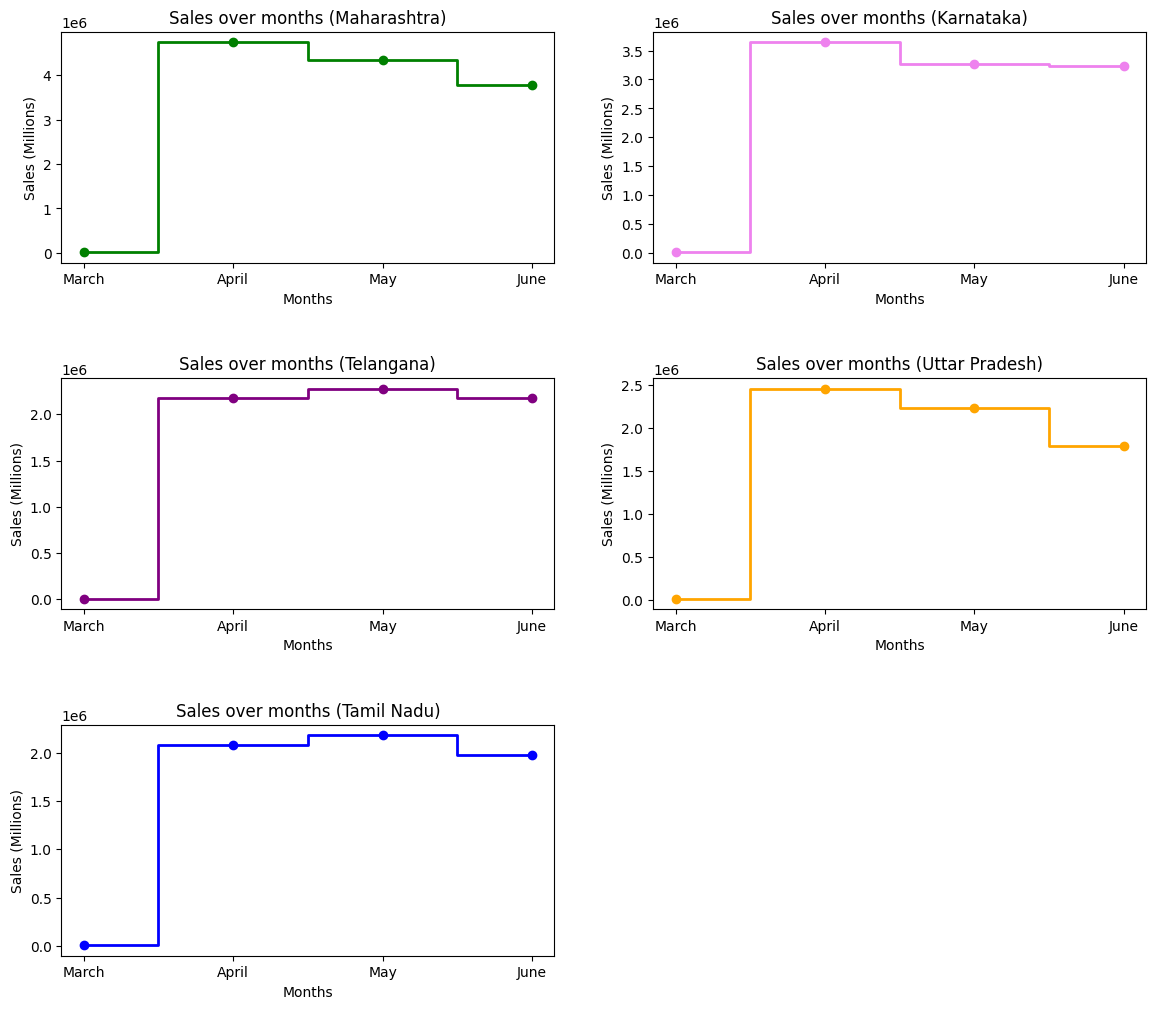

In [281]:
plt.figure(figsize = (14, 12))
plt.subplot(3, 2, 1)

plt.xlabel('Months')
plt.ylabel('Sales (Millions)')
plt.title('Sales over months (Maharashtra)')
plt.step(state1['month_name'], state1['Amount'], linestyle = '-', marker = 'o', color = 'green', linewidth = 2, where = 'mid')

plt.subplot(3, 2, 2)
plt.xlabel('Months')
plt.ylabel('Sales (Millions)')
plt.title('Sales over months (Karnataka)')
plt.step(state2['month_name'], state2['Amount'], linestyle = '-', marker = 'o', color = 'violet', linewidth = 2, where = 'mid')

plt.subplot(3, 2, 3)
plt.xlabel('Months')
plt.ylabel('Sales (Millions)')
plt.title('Sales over months (Telangana)')
plt.step(state3['month_name'], state3['Amount'], linestyle = '-', marker = 'o', color = 'purple', linewidth = 2, where = 'mid')

plt.subplot(3, 2, 4)
plt.xlabel('Months')
plt.ylabel('Sales (Millions)')
plt.title('Sales over months (Uttar Pradesh)')
plt.step(state4['month_name'], state4['Amount'], linestyle = '-', marker = 'o', color = 'orange', linewidth = 2, where = 'mid')

plt.subplot(3, 2, 5)
plt.xlabel('Months')
plt.ylabel('Sales (Millions)')
plt.title('Sales over months (Tamil Nadu)')
plt.step(state5['month_name'], state5['Amount'], linestyle = '-', marker = 'o', color = 'blue', linewidth = 2, where = 'mid')

plt.subplots_adjust(hspace = 0.5)
plt.show()

### Pairwise Distribution of fulfillment services

The distribution below illustrates the pairwise distribution of data for Amount and Quantity.

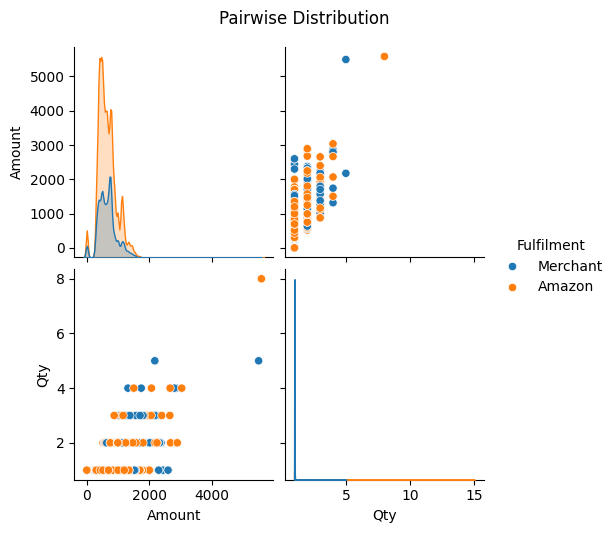

In [91]:
sns.pairplot(df_new, hue='Fulfilment', vars=['Amount', 'Qty'])
plt.suptitle('Pairwise Distribution', y=1.05)
plt.show()

# Insights:

**From the above Analysis:**
1. Sales initially showed minimal activity but experienced a significant increase until April. After this peak, sales began to decline steadily by approximately 1 million per month.
2. The Amazon sales channel is dominant, with no orders recorded from other channels.
3. T-shirts, especially in size M, have the highest number of orders and generate the most revenue, followed by shirts, blazers, and trousers.
4. The dominance of T-shirts in terms of popularity and revenue remains consistent across different regions.
5. Expedited shipping is significantly more popular than standard shipping, indicating a customer preference for faster delivery options.
6. Amazon's fulfillment service is the most prominent, with most orders being shipped or on the way. However, there are still some unshipped or  cancelled orders within the Amazon service.
7. Bengaluru has the highest number of Amazon customers, followed by Hyderabad and Mumbai.
8. Maharashtra has the most Amazon customers at the state level, followed by Karnataka and Telangana.
9. Punjab leads in B2B sales, while Ladakh has the highest B2C sales.
10. The majority of transactions are business-to-consumer, with minimal business-to-business deals.

# Recommendations:

1. Given that T-shirts, especially in size M and L, are highly popular, ensure adequate stock levels to meet demand. Consider expanding the T-shirt product line with more designs, colors, and sizes.
2. Focus on increasing the inventory and variety of other popular items like shirts, blazers, and trousers for increase sales.
3. Since Amazon is the dominant sales channel, continue to strengthen this channel. Explore promotional strategies and exclusive deals to maintain and grow this channel.
4. While Amazon is dominant, investigate potential in other sales channels to reduce dependency and tap into new customer bases.
5. Given the preference for expedited shipping, consider offering more incentives for this service, such as discounts or bundled deals whereas for stanadard shipping enhance the attractiveness of standard shipping by offering free shipping for orders above a certain value or loyalty rewards.
6. Investigating and resolving the reasons behind unshipped and cancelled orders within the Amazon service, improving logistics and customer communication to reduce these occurrences can be very helpfull to prevent the cancelling of orders.
7. Enhance the efforts and marketing strategies to increase sales on regions having minimal sales.
8.  Leverage the strong B2B sales in Punjab by offering tailored business packages and bulk purchase discounts. Expand B2B marketing efforts in regions with potential for growth. Additionally continue to support and enhance B2C sales in regions like Ladakh with targeted advertising and promotions.
9.  Regularly gather customer feedback to understand preferences and pain points. Use this data to adjust product offerings, improve service levels, and enhance the overall customer experience.